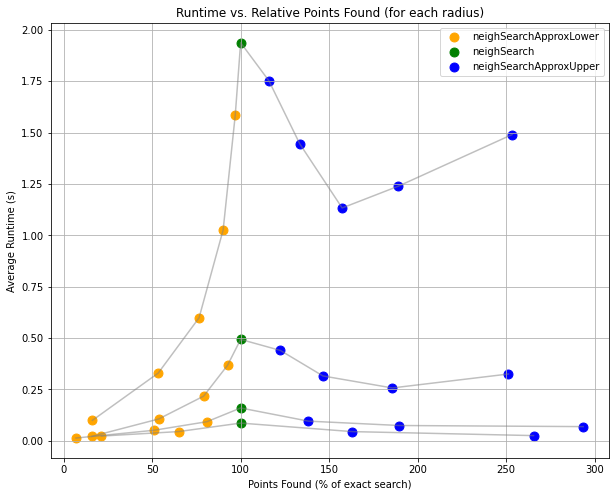

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("out/approx_search/Lille_0/Lille_0-2025-02-25-17:32:54.csv")

# Define a color mapping for each operation type.
color_map = {
    'neighSearch': 'green',             # exact search
    'neighSearchApproxUpper': 'blue',   # higher bound approximate search
    'neighSearchApproxLower': 'orange'  # lower bound approximate search
}

# Create a figure and axis.
fig, ax = plt.subplots(figsize=(10, 8))

# Process every unique radius.
for r in sorted(df['radius'].unique()):
    # Get all rows for this radius.
    group = df[df['radius'] == r].copy()
    
    # Identify the exact search (baseline) for this radius (tolerance 0).
    baseline_row = group[(group['operation'] == 'neighSearch') &
                         (group['tolerance_percentage'] == 0)]
    if baseline_row.empty:
        continue  # Skip if no exact search is available.
    
    baseline = baseline_row['avg_result_size'].iloc[0]
    
    # Compute the relative number of points (as a percentage of the exact search).
    group['relative_points'] = (group['avg_result_size'] / baseline) * 100
    
    # Remove approximate searches that equal the exact search (i.e. relative_points == 100)
    approx_mask = (group['operation'] != 'neighSearch') & (group['relative_points'] == 100)
    group = group[~approx_mask]
    
    # Sort the group by relative_points so the line is drawn in order.
    group_sorted = group.sort_values('relative_points')
    
    # Connect the points for this radius with a gray line.
    ax.plot(group_sorted['relative_points'], group_sorted['mean'],
            color='gray', alpha=0.5)
    
    # Now plot the points using their assigned colors.
    for op in group_sorted['operation'].unique():
        op_group = group_sorted[group_sorted['operation'] == op]
        ax.scatter(op_group['relative_points'], op_group['mean'],
                   color=color_map[op], s=80, label=op)

# Remove duplicate labels in the legend.
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Set labels and title.
ax.set_xlabel("Points Found (% of exact search)")
ax.set_ylabel("Average Runtime (s)")
ax.set_title("Runtime vs. Relative Points Found (for each radius)")
ax.grid(True)

plt.show()
